# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Program generates a list of randome cities, determines the weather in those cities
# then analysis the weather in those cities using linear regression

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import math
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV), saved file data to limit using weatherapi requests limits on requests
# output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
# Generate list of random lat and long to create lis of cities for analysis of weather
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes for random generator
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using citipy
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
list_length = (len(cities))
print(list_length)

604


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# using OpenWeatherMap API to find weather in cities created above
# print the log of process of API calls, using time delay
base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "q": "Madison",
    "units":"imperial",
    "appid": weather_api_key
    }

# create list to hold our data retrieved from the API
city_list = []
lat = []
lng = []
max_temp = []
humidty = []
cloudiness = []
wind_speed = []
country = []
date = []

# header for data retrieval print statement
print("Beginning Data Retrieval")
print("------------------------------")

count = 0  # count of city in the list, skip first sleep, extract city, and exit loop
max_sets = math.ceil(list_length/50)  # number of sets required for api calls

for set in range(1, max_sets):
    # OpenWeatherMap API temporary blocked due to the continual sufficient exceeding of the 
    # calls per minute limit by performing 599 requests within a minute but the limit for the Free account is 60 rpm.
    if count > 0:
        time.sleep(60)           
    for record in range(1,51):
        city = cities[count]
        count += 1
        params["q"] = city
        response = requests.get(base_url, params).json()
        try:       
            city_list.append(response['name'])
            print(f"Processing Record {record} of set {set} | {city}")
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidty.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response["sys"]['country'])
            date.append(response['dt'])
        except:
            print('City not found. Skipping...')
        if count == list_length:
            break
            
print("------------------------------")                
print("Data Retrieval Complete  ")
print("------------------------------") 


Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1 | bluff
Processing Record 2 of set 1 | kodiak
Processing Record 3 of set 1 | jamestown
Processing Record 4 of set 1 | cockburn town
Processing Record 5 of set 1 | rikitea
Processing Record 6 of set 1 | port lincoln
Processing Record 7 of set 1 | tokur
Processing Record 8 of set 1 | kristianstad
Processing Record 9 of set 1 | boca do acre
Processing Record 10 of set 1 | ushuaia
Processing Record 11 of set 1 | ribeira grande
Processing Record 12 of set 1 | marawi
Processing Record 13 of set 1 | dikson
Processing Record 14 of set 1 | atuona
Processing Record 15 of set 1 | punta arenas
Processing Record 16 of set 1 | lompoc
Processing Record 17 of set 1 | carauari
Processing Record 18 of set 1 | guerrero negro
City not found. Skippin...
Processing Record 20 of set 1 | east london
Processing Record 21 of set 1 | grindavik
Processing Record 22 of set 1 | olovyannaya
City not found. Skippin...
Processing Reco

Processing Record 8 of set 5 | glencoe
Processing Record 9 of set 5 | freeport
Processing Record 10 of set 5 | kahului
Processing Record 11 of set 5 | kamloops
Processing Record 12 of set 5 | linxia
Processing Record 13 of set 5 | ukiah
Processing Record 14 of set 5 | praya
City not found. Skippin...
Processing Record 16 of set 5 | vardo
Processing Record 17 of set 5 | homer
Processing Record 18 of set 5 | wad rawah
Processing Record 19 of set 5 | kemijarvi
Processing Record 20 of set 5 | kabo
Processing Record 21 of set 5 | cherdyn
Processing Record 22 of set 5 | norwich
Processing Record 23 of set 5 | songjianghe
Processing Record 24 of set 5 | maningrida
Processing Record 25 of set 5 | tongliao
Processing Record 26 of set 5 | pak thong chai
Processing Record 27 of set 5 | hami
Processing Record 28 of set 5 | lazne belohrad
Processing Record 29 of set 5 | castro
City not found. Skippin...
Processing Record 31 of set 5 | nishihara
Processing Record 32 of set 5 | tanout
Processing Reco

Processing Record 14 of set 9 | langarud
Processing Record 15 of set 9 | voiron
Processing Record 16 of set 9 | dourados
Processing Record 17 of set 9 | requena
Processing Record 18 of set 9 | nanakuli
Processing Record 19 of set 9 | lubango
Processing Record 20 of set 9 | eureka
Processing Record 21 of set 9 | hegang
Processing Record 22 of set 9 | kloulklubed
Processing Record 23 of set 9 | rochegda
Processing Record 24 of set 9 | bara
Processing Record 25 of set 9 | tilichiki
Processing Record 26 of set 9 | asahikawa
Processing Record 27 of set 9 | los llanos de aridane
Processing Record 28 of set 9 | dingle
City not found. Skippin...
Processing Record 30 of set 9 | katsuura
Processing Record 31 of set 9 | buchanan
Processing Record 32 of set 9 | houston
Processing Record 33 of set 9 | egvekinot
Processing Record 34 of set 9 | rodas
Processing Record 35 of set 9 | vangaindrano
Processing Record 36 of set 9 | chumikan
Processing Record 37 of set 9 | quijingue
City not found. Skippin.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# create the dataframe from the api call
weather_df = pd.DataFrame({'City': city_list,'Lat':lat, 'Lng':lng,'Max Temp': max_temp,'Humidity':humidty,
                           'Cloudiness':cloudiness, 'Wind Speed':wind_speed, 'Country':country, 'Date':date})
# save the data to a file so we do not need to execute above code repeatedly for below analysis
weather_df.to_csv("Output/city_weather.csv", index = False, header=True) # write
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,45.30,79,10,2.62,NZ,1603714706
1,Saint Paul Harbor,57.79,-152.41,48.20,74,90,17.22,US,1603714706
2,Jamestown,42.10,-79.24,45.00,100,90,3.36,US,1603714611
3,Cockburn Town,21.46,-71.14,83.35,80,90,19.84,TC,1603714707
4,Rikitea,-23.12,-134.97,75.07,84,100,19.62,PF,1603714707
...,...,...,...,...,...,...,...,...,...
550,Fayetteville,35.05,-78.88,55.00,93,90,9.17,US,1603715252
551,Jizan,17.33,42.67,95.00,50,20,16.11,SA,1603715447
552,Vestmannaeyjar,63.44,-20.27,44.60,87,40,16.11,IS,1603715507
553,Husavik,66.04,-17.34,39.20,80,90,6.93,IS,1603715507


In [33]:
# read the data back in to use for data analysis below
# do not have to run above code anymore if need to restart analysis

# ***********   start here   **********
weather_df = pd.read_csv("Output/city_weather.csv")  # read
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.800721,17.711207,60.009982,72.144144,56.212613,8.389315,1.603715e+09
std,33.368444,90.330903,22.986872,22.528220,36.809562,5.728202,2.459486e+02
min,-54.800000,-179.170000,-0.670000,1.000000,0.000000,0.070000,1.603714e+09
25%,-6.380000,-64.820000,44.600000,63.000000,20.000000,4.070000,1.603715e+09
50%,23.670000,21.700000,64.170000,78.000000,69.000000,6.980000,1.603715e+09
75%,50.015000,100.040000,78.800000,88.500000,90.000000,11.410000,1.603715e+09
max,78.220000,179.320000,102.990000,100.000000,100.000000,29.280000,1.603716e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
check_humidity = weather_df.loc[(weather_df['Humidity']>100)]

In [37]:
#  Get the indices of cities that have humidity over 100%.
check_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "weather_df".
#  delete ..... subset_df = weather_df
weather_df = weather_df.loc[(weather_df['Humidity']<=100)]
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,45.30,79,10,2.62,NZ,1603714706
1,Saint Paul Harbor,57.79,-152.41,48.20,74,90,17.22,US,1603714706
2,Jamestown,42.10,-79.24,45.00,100,90,3.36,US,1603714611
3,Cockburn Town,21.46,-71.14,83.35,80,90,19.84,TC,1603714707
4,Rikitea,-23.12,-134.97,75.07,84,100,19.62,PF,1603714707
...,...,...,...,...,...,...,...,...,...
550,Fayetteville,35.05,-78.88,55.00,93,90,9.17,US,1603715252
551,Jizan,17.33,42.67,95.00,50,20,16.11,SA,1603715447
552,Vestmannaeyjar,63.44,-20.27,44.60,87,40,16.11,IS,1603715507
553,Husavik,66.04,-17.34,39.20,80,90,6.93,IS,1603715507


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

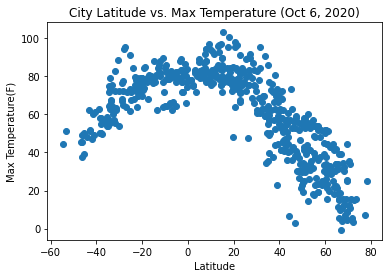

In [15]:
x_lat = weather_df['Lat']
y_temp = weather_df['Max Temp']

plt.scatter(x_lat,y_temp)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitude vs. Max Temperature (Oct 26, 2020)')
plt.savefig("Output/Latitude-Temperature.png")
plt.show()


In [ ]:
### Analysis
Data for weather by temperature. More cities are in the northern hemisphere at higher latitudes. With O
being the equator temperature increases. Northern hemisphere which is heading to winter is colder than 
southern hemisphere heading into summer. 

## Latitude vs. Humidity Plot

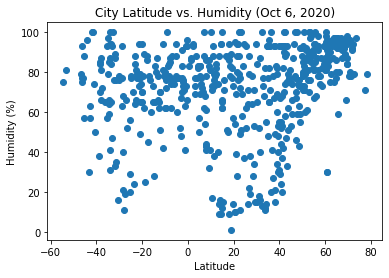

In [16]:
x_lat = weather_df['Lat']
y_temp = weather_df['Humidity']

plt.scatter(x_lat,y_temp)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (Oct 26, 2020)')
plt.savefig("Output/Latitude-Humidity.png")
plt.show()

In [17]:
### Analysis
Data is latitude and humidity 
Humidity by cities. Most likely higher latitudes are in Europe which get strong ocean effects

## Latitude vs. Cloudiness Plot

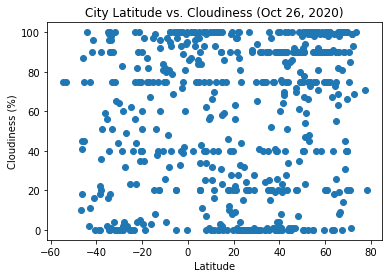

In [18]:
x_lat = weather_df['Lat']
y_temp = weather_df['Cloudiness']

plt.scatter(x_lat,y_temp)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (Oct 26, 2020)')
plt.savefig("Output/Latitude-Cloudiness.png")
plt.show()

In [ ]:
### Analysis
Data is for latitudes and cloudiness in those cities across the world
Appears some cloudiness readings cluster around 0%, 20%, 40%, 75%, 90% and 100%, perhaps some typ
of data manipulation. does not appear random

## Latitude vs. Wind Speed Plot

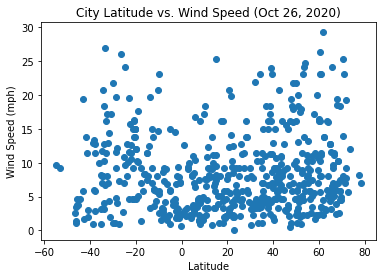

In [19]:
x_lat = weather_df['Lat']
y_temp = weather_df['Wind Speed']

plt.scatter(x_lat,y_temp)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (Oct 26, 2020)')
plt.savefig("Output/Latitude-Wind Speed.png")
plt.show()

In [ ]:
### Analysis
Plot of latitude and wind speed for random cities.
Nothing appears strange about this data and appears random based on latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8732364629840228


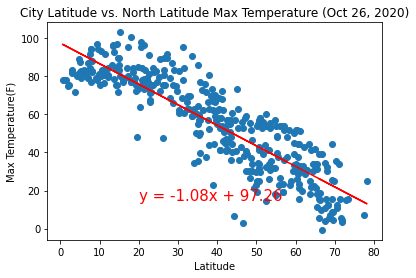

In [39]:
# gather data for temp verse latitude graphs, northern hemisphere
temp_df = weather_df[['Lat','Max Temp']]
north_temp_df = temp_df.loc[(temp_df['Lat']> 0)]
x_lat = north_temp_df['Lat']
y_temp = north_temp_df['Max Temp']

# create scatter plot
plt.scatter(x_lat,y_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitude vs. North Latitude Max Temperature (Oct 26, 2020)')

#add regression line to scatter plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
plt.plot(x_lat, regress_values, "r-")
reg_str = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(reg_str,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("Output/North-Latitude-Temperature.png")
plt.show()

In [ ]:
### Analysis
There is a strong negative relationship between temparature and latitude with a r value of -0.82
As latude increases the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7138275895932374


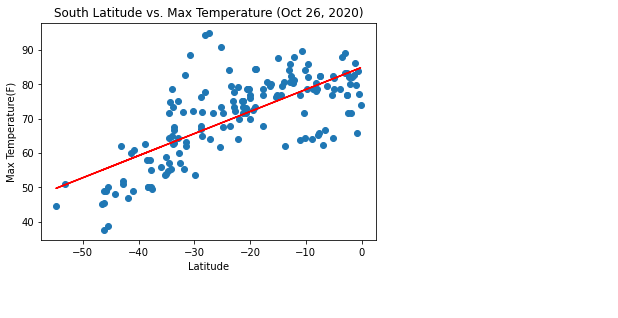

In [21]:
# gather data for temp verse latitude graphs
temp_df = weather_df[['Lat','Max Temp']]
south_temp_df = temp_df.loc[(temp_df['Lat']< 0)]
x_lat = south_temp_df['Lat']
y_temp = south_temp_df['Max Temp']

# create scatter plot
plt.scatter(x_lat,y_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('South Latitude vs. Max Temperature (Oct 26, 2020)')

#add regression line to scatter plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
plt.plot(x_lat, regress_values, "r-")
reg_str = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(reg_str,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("Output/South-Latitude-Temperature.png")
plt.show()


In [ ]:
### Analysis
There is a strong positive relationship between temperature and latitude with an r-value of 0.71
As latude increases the temperature also increases and is the line slope is positive, the opposite of 
the northern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3290533471425045


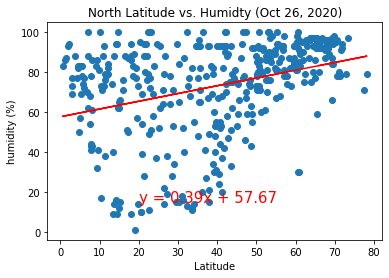

In [22]:
# gather data for humid verse latitude graphs
humid_df = weather_df[['Lat','Humidity']]
north_humid_df = humid_df.loc[(humid_df['Lat']> 0)]
x_lat = north_humid_df['Lat']
y_humid = north_humid_df['Humidity']

# create scatter plot
plt.scatter(x_lat,y_humid)
plt.xlabel('Latitude')
plt.ylabel('humidity (%)')
plt.title('North Latitude vs. Humidty (Oct 26, 2020)')

#add regression line to scatter plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_lat, y_humid)
regress_values = x_lat * slope + intercept
plt.plot(x_lat, regress_values, "r-")
reg_str = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(reg_str,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("Output/Latitude-humidity-north-regression.png")
plt.show()

In [ ]:
### Analysis
Data and plot for himidit in the northern hemisphere:
There is a moderate relanship as latitude increase so does himidity % in the northern hemisphere
As mentioned before this might be related to Europe or season related going into winter.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0499081724092438


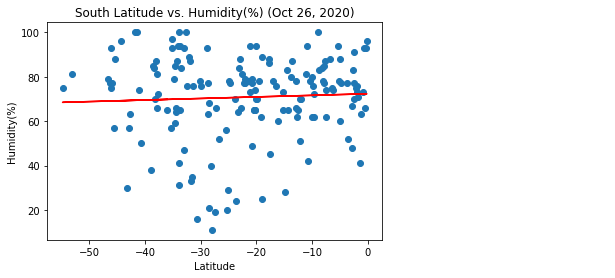

In [23]:
# gather data for humid verse latitude graphs 9
humid_df = weather_df[['Lat','Humidity']]
south_humid_df = humid_df.loc[(humid_df['Lat']< 0)]
x_lat = south_humid_df['Lat']
y_humid = south_humid_df['Humidity']

# create scatter plot 4
plt.scatter(x_lat,y_humid)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('South Latitude vs. Humidity(%) (Oct 26, 2020)')

#add regression line to scatter plot 2
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_lat, y_humid)
regress_values = x_lat * slope + intercept
plt.plot(x_lat, regress_values, "r-")
reg_str = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(reg_str,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("Output/Latitude-humidity-south-regression.png")
plt.show()

In [ ]:
### Analysis
Data and plot of humity in the Southern hemisphere
This is different than the northern hemisphere, with r-value = 0.05 there is no correlation at all here

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1901867625951656


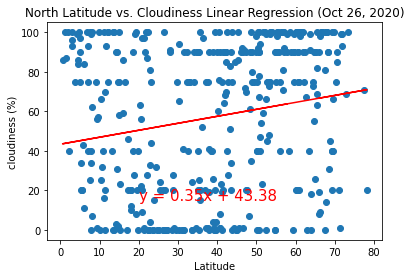

In [24]:
# gather data for cloud verse latitude graphs
cloud_df = weather_df[['Lat','Cloudiness']]
north_cloud_df = cloud_df.loc[(cloud_df['Lat']> 0)]
x_lat = north_cloud_df['Lat']
y_cloud = north_cloud_df['Cloudiness']

# create scatter plot
plt.scatter(x_lat,y_cloud)
plt.xlabel('Latitude')
plt.ylabel('cloudiness (%)')
plt.title('North Latitude vs. Cloudiness Linear Regression (Oct 26, 2020)')

#add regression line to scatter plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_lat, y_cloud)
regress_values = x_lat * slope + intercept
plt.plot(x_lat, regress_values, "r-")
reg_str = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(reg_str,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("Output/Latitude-cloudiness-north-regression.png")
plt.show()


In [ ]:
### Analysis
Data and linear regression plot of cloudiness in the northern hemisphere and many more cities in the 
    northern hemisphere than southern hemisphere in our data. Also we are seeing clusters in the northern
    hemishphere around some cloudiness % such as 0, 40, 75 ...
Per the linear regression, there is very low correlation as latitude increases so does cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24258830875275753


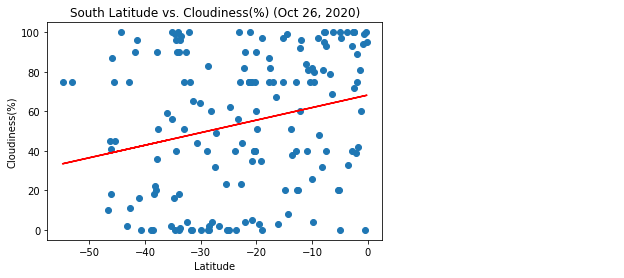

In [25]:
# gather data for cloud verse latitude graphs 9
cloud_df = weather_df[['Lat','Cloudiness']]
south_cloud_df = cloud_df.loc[(cloud_df['Lat']< 0)]
x_lat = south_cloud_df['Lat']
y_cloud = south_cloud_df['Cloudiness']

# create scatter plot 4
plt.scatter(x_lat,y_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('South Latitude vs. Cloudiness(%) (Oct 26, 2020)')
plt.savefig("Output/Latitude-Cloudiness-regression.png")

#add regression line to scatter plot 2
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_lat, y_cloud)
regress_values = x_lat * slope + intercept
plt.plot(x_lat, regress_values, "r-")
reg_str = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(reg_str,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("Output/Latitude-cloudiness-south-regression.png")
plt.show()


In [ ]:
### Analysis 
Data and linear regression plot of cloudiness in the southern hemisphere and many less cities in the 
    Southern hemisphere than Northern hemisphere in. Also we are seeing some clusters in cloudiness 
    see 0, 40, 75 but not as obvious as in the north
Per the linear regression, there is a low correlation (r = 0.24) as latitude increases so does cloudiness
    but with my Oct 6 data it was even less at (r = 0.08). Maybe weather pattern or season related 
    pattern here.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.21173266278840572


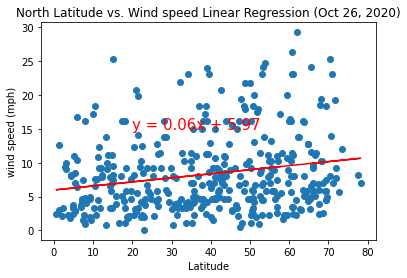

In [40]:
# gather data for wind verse latitude graphs
wind_df = weather_df[['Lat','Wind Speed']]
north_wind_df = wind_df.loc[(wind_df['Lat']> 0)]
x_lat = north_wind_df['Lat']
y_wind = north_wind_df['Wind Speed']

# create scatter plot
plt.scatter(x_lat,y_wind)
plt.xlabel('Latitude')
plt.ylabel('wind speed (mph)')
plt.title('North Latitude vs. Wind speed Linear Regression (Oct 26, 2020)')

#add regression line to scatter plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_lat, y_wind)
regress_values = x_lat * slope + intercept
plt.plot(x_lat, regress_values, "r-")
reg_str = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(reg_str,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("Output/Latitude-windSpeed-north-regression.png")
plt.show()


In [ ]:
### Analysis 
Data and plot of wind speed in the northern hemisphere
There appears there is no relationship with an r-value of 0.21 between wind speed as 
latitude changes.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11139779564106403


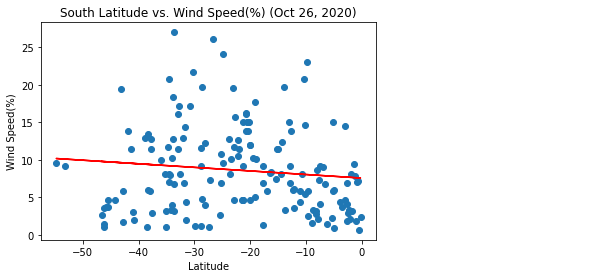

In [41]:
# gather data for Wind verse latitude graphs 9
wind_df = weather_df[['Lat','Wind Speed']]
south_wind_df = wind_df.loc[(wind_df['Lat']< 0)]
x_lat = south_wind_df['Lat']
y_wind = south_wind_df['Wind Speed']

# create scatter plot 4
plt.scatter(x_lat,y_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(%)')
plt.title('South Latitude vs. Wind Speed(%) (Oct 26, 2020)')


#add regression line to scatter plot 2
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_lat, y_wind)
regress_values = x_lat * slope + intercept
plt.plot(x_lat, regress_values, "r-")
reg_str = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(reg_str,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("Output/Latitude-windSpeed-south-regression.png")
plt.show()

In [ ]:
Data and plot of wind speed in the Southern hemisphere
There appears there is no relationship with an r-value of 0.11 between wind speed as 
latitude changes.